# Exploratory Data Analysis and Visualization on US Cars Dataset

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the csv file and creating dataframe 
df = pd.read_csv('USA_cars_datasets.csv')

In [3]:
df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [4]:
df.drop(['Unnamed: 0','vin'],axis=1,inplace=True)

In [5]:
df

,price,brand,model,year,title_status,mileage,color,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,167762227,florida,usa,2 days left


In [6]:
df.shape

(2499, 11)

In [7]:
df.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


Observations made after calling the describe function:
- minimum price of a car is zero which can't be possible. Hence have to replace the value with appropriate value.
- the oldest car is from 1973
- First quartile value - 25% lies in the year 2016 which shows that more than 75% of the cars are new models built after 2016.

In [8]:
# checking for missing values
df.isnull().sum().sort_values(ascending=False)

condition       0
country         0
state           0
lot             0
color           0
mileage         0
title_status    0
year            0
model           0
brand           0
price           0
dtype: int64

From above observation some of the car values were zero. we will replace them with the median of the price column

In [9]:
# finding median of the price column
median_price = df['price'].median()
print(median_price)

16900.0


In [10]:
# replacing zero values with the median
df['price'] = df['price'].astype(int)
df['price'].replace(0, median_price, inplace=True)

In [11]:
df.corr().T

,price,year,mileage,lot
price,1.000000,0.338973,-0.358102,0.139250
year,0.338973,1.000000,-0.594686,0.164582
mileage,-0.358102,-0.594686,1.000000,-0.130475
lot,0.139250,0.164582,-0.130475,1.000000


# Visualization

In [12]:
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 8, 5
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns',None)
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Number of Cars per Brand

In [13]:
cars_per_brand = df.groupby('brand')['model'].count().reset_index().sort_values('model',ascending = False).head(10)
cars_per_brand = cars_per_brand.rename(columns = {'model':'count'})
fig = px.bar(cars_per_brand, x='brand', y='count', color='count')
fig.show()

#### Cars by Model Year

In [14]:
cars_by_model_year = df.groupby('year')['model'].count().reset_index().sort_values('model',ascending = False)
cars_by_model_year = cars_by_model_year[cars_by_model_year['year'] >= 2010]
cars_by_model_year = cars_by_model_year.rename(columns = {'model':'count'})
fig = px.bar(cars_by_model_year, x='year', y='count', color='count')
fig.show()

#### Cars by Colour

In [15]:
car_colors = df.groupby('color')['model'].count().reset_index().sort_values('model',ascending = False).head(10)
car_colors = car_colors.rename(columns = {'model':'count'})
fig = px.bar(car_colors, x='color', y='count', color='count')
fig.show()

#### Cars by State

In [16]:
cars_per_state = df.groupby('state')['model'].count().reset_index().sort_values('model',ascending = False).head(10)
cars_per_state = cars_per_state.rename(columns = {'model':'count'})
fig = px.bar(cars_per_state, x='state', y='count', color='count')
fig.show()

#### Most Expensive Cars

In [17]:
expensive_cars = df.sort_values('price',ascending = False).head(2)
fig = px.bar(expensive_cars, x='brand', y='price', color='price')
fig.show()

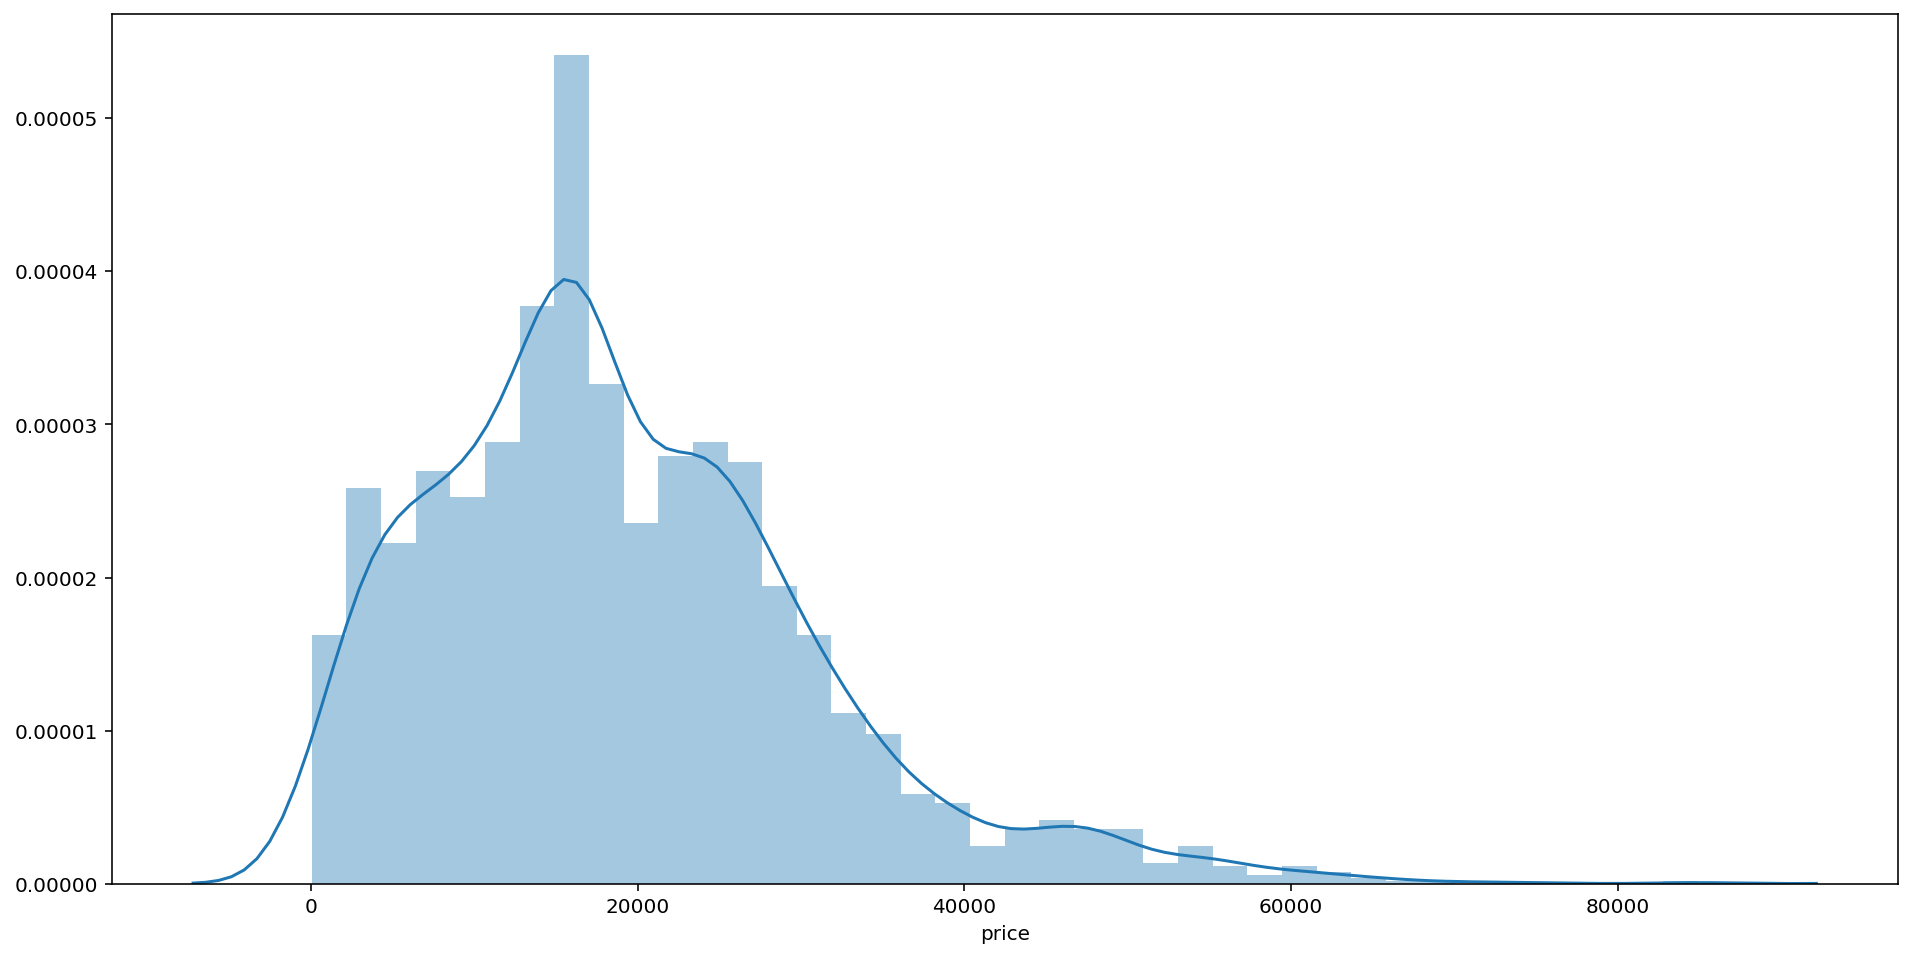

In [18]:
plt.figure(figsize=(16,8))
sns.distplot(df['price'])

In [19]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 0.977797
Kurtosis: 1.481046


#### Price vs Model Year

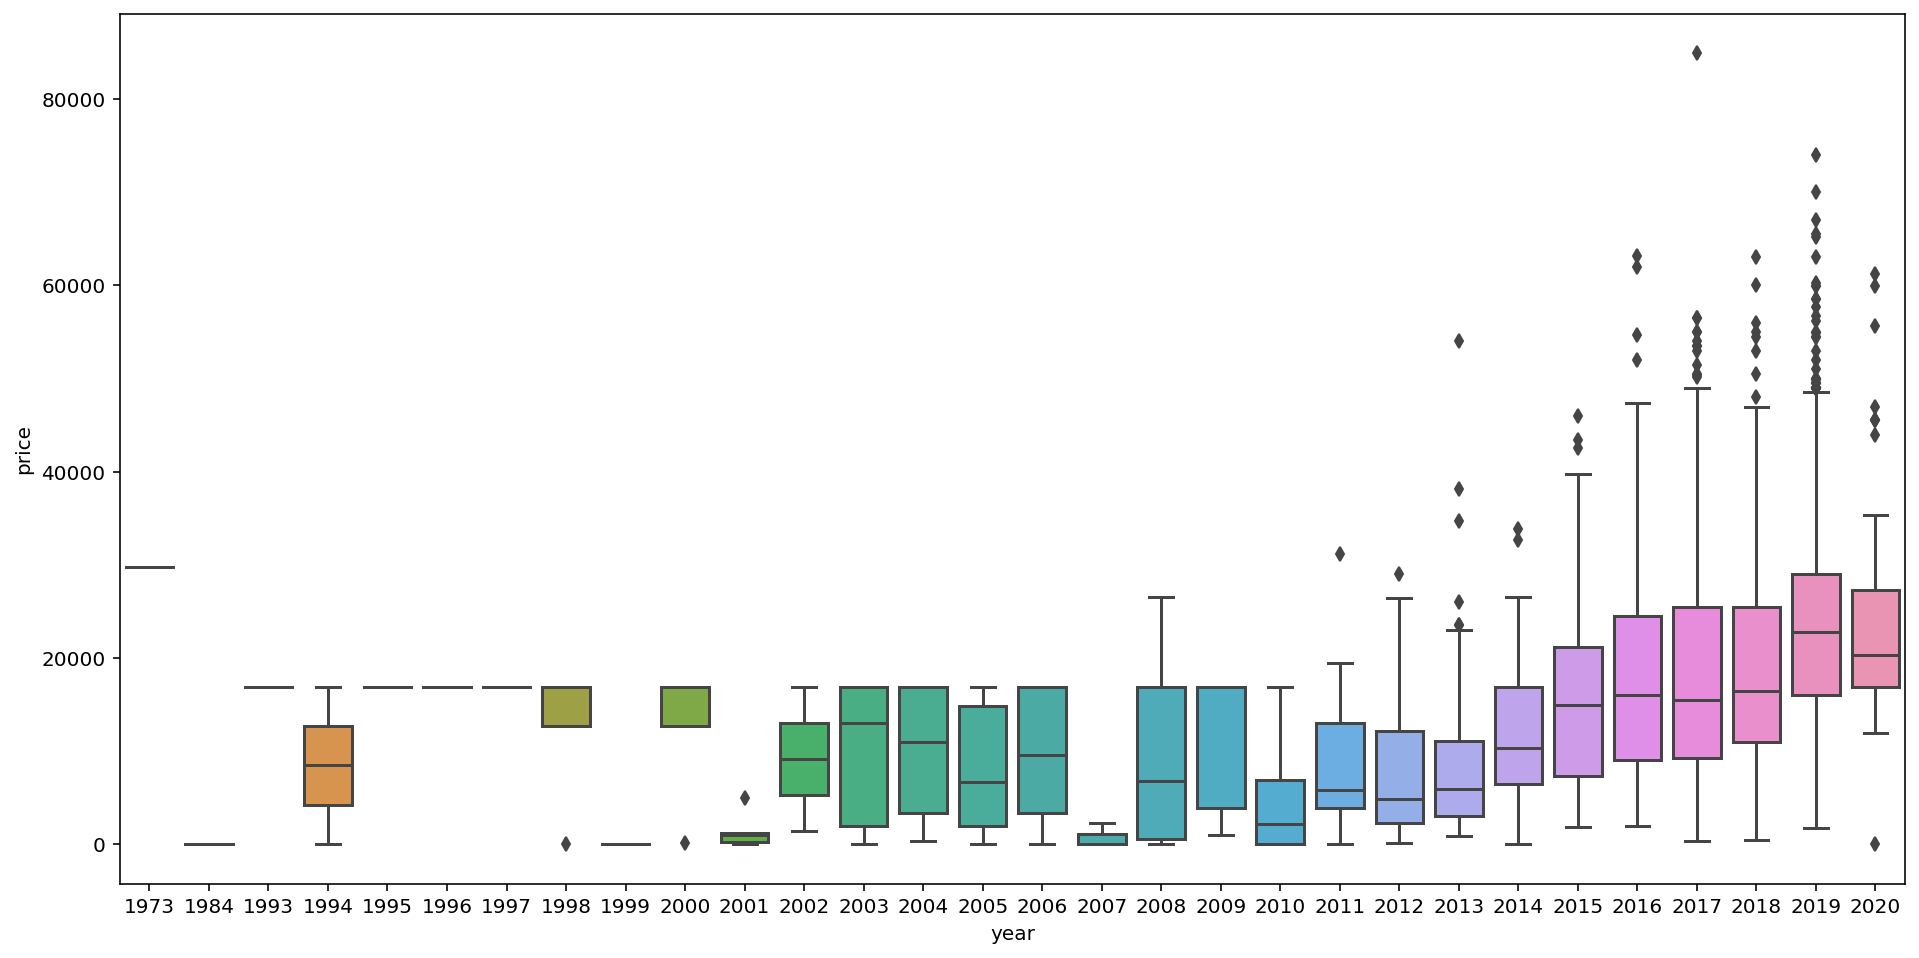

In [20]:
data = df[['price', 'year']]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='year', y='price', data=data)

The price of the cars and the model year are proportional, i.e. the newer the model of the car, higher the price 

#### Pairplot

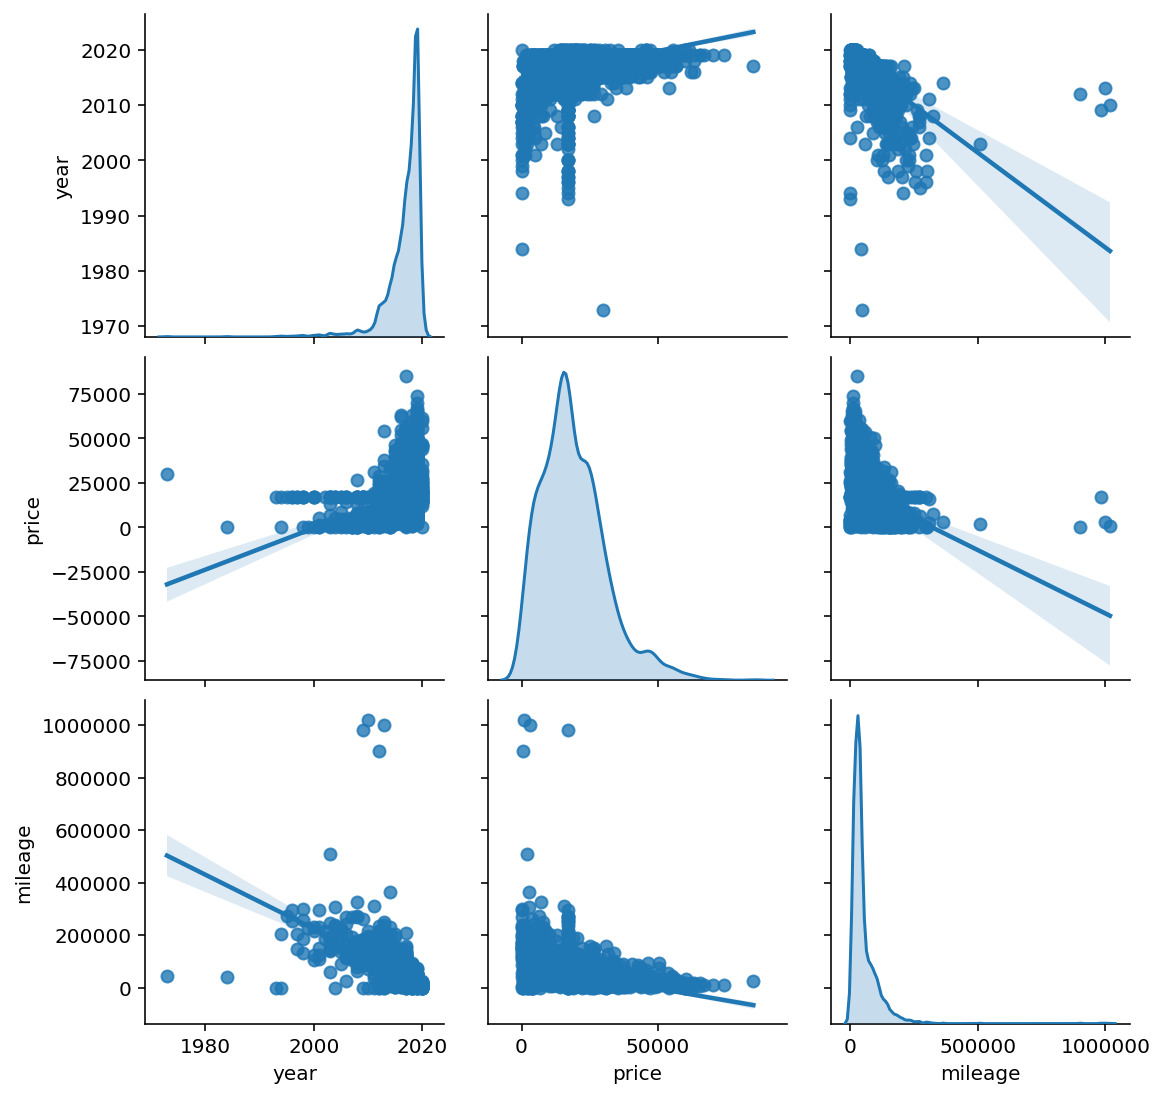

In [21]:
# Pair Plots
# Plot pairwise relationships in a dataset

cont_col= ['year','price','mileage']
sns.pairplot(df[cont_col],  kind="reg", diag_kind = "kde")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A7D6140C8>,
      dtype=object)

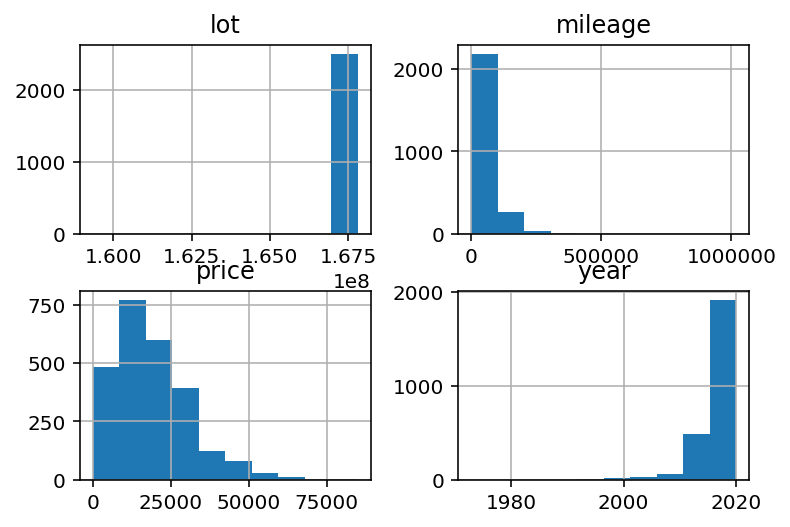

In [22]:
df.hist()

#### Plotting a correlation between no. of cars and the prices

Text(0, 0.5, 'No. of Cars')

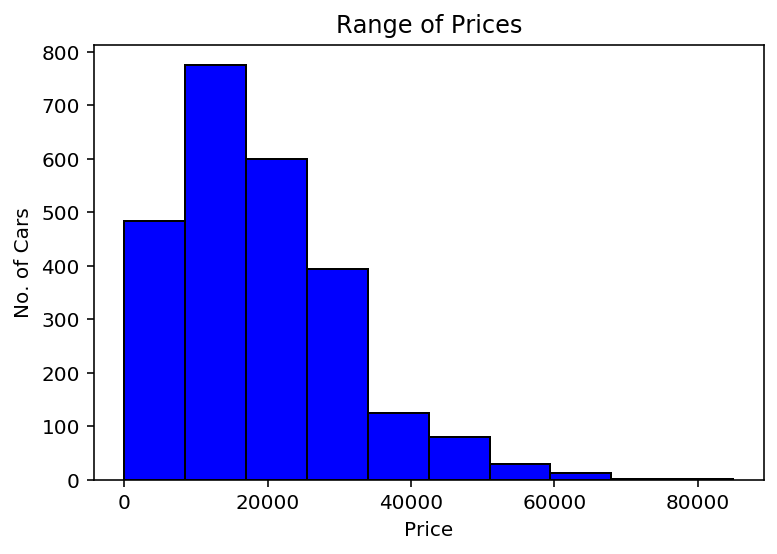

In [23]:
plt.hist(df['price'], color = 'blue', edgecolor = 'black', bins = 10)
plt.title('Range of Prices')
plt.xlabel('Price')
plt.ylabel('No. of Cars')

We infer from the above graph that most of the cars are priced from 10k to 20k

#### Price vs Mileage of the Cars

<Figure size 1152x576 with 0 Axes>

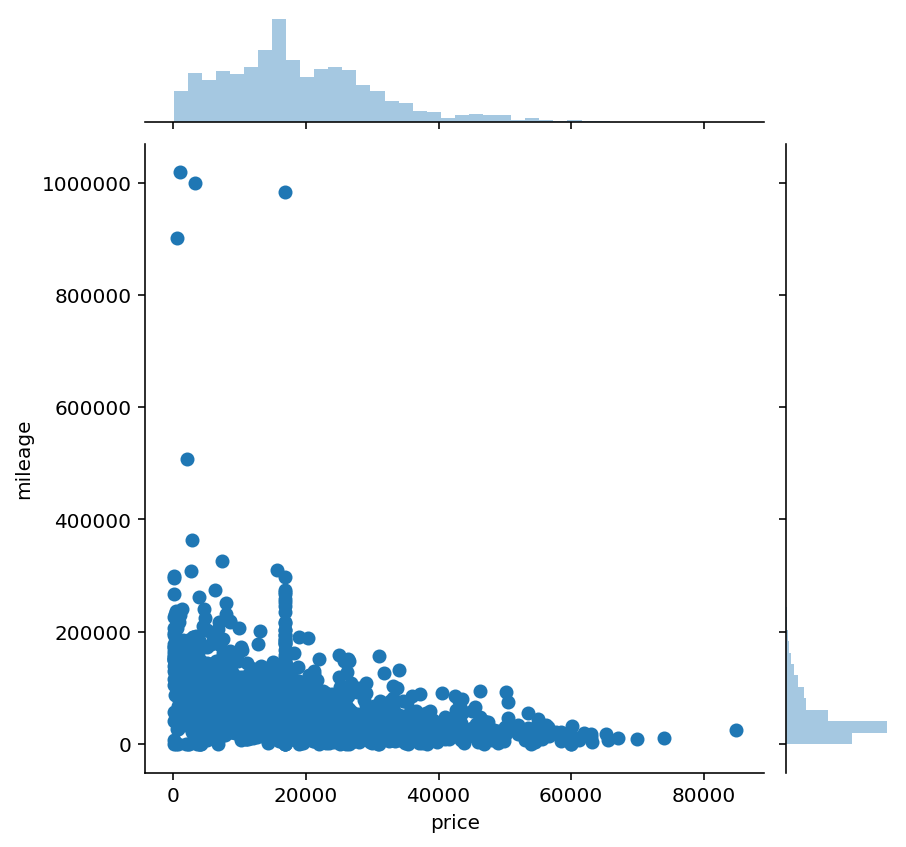

In [24]:
plt.figure(figsize = (16, 8))
sns.jointplot(x=df['price'], y=df['mileage']);

#### Price range of various models of cars using Boxplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

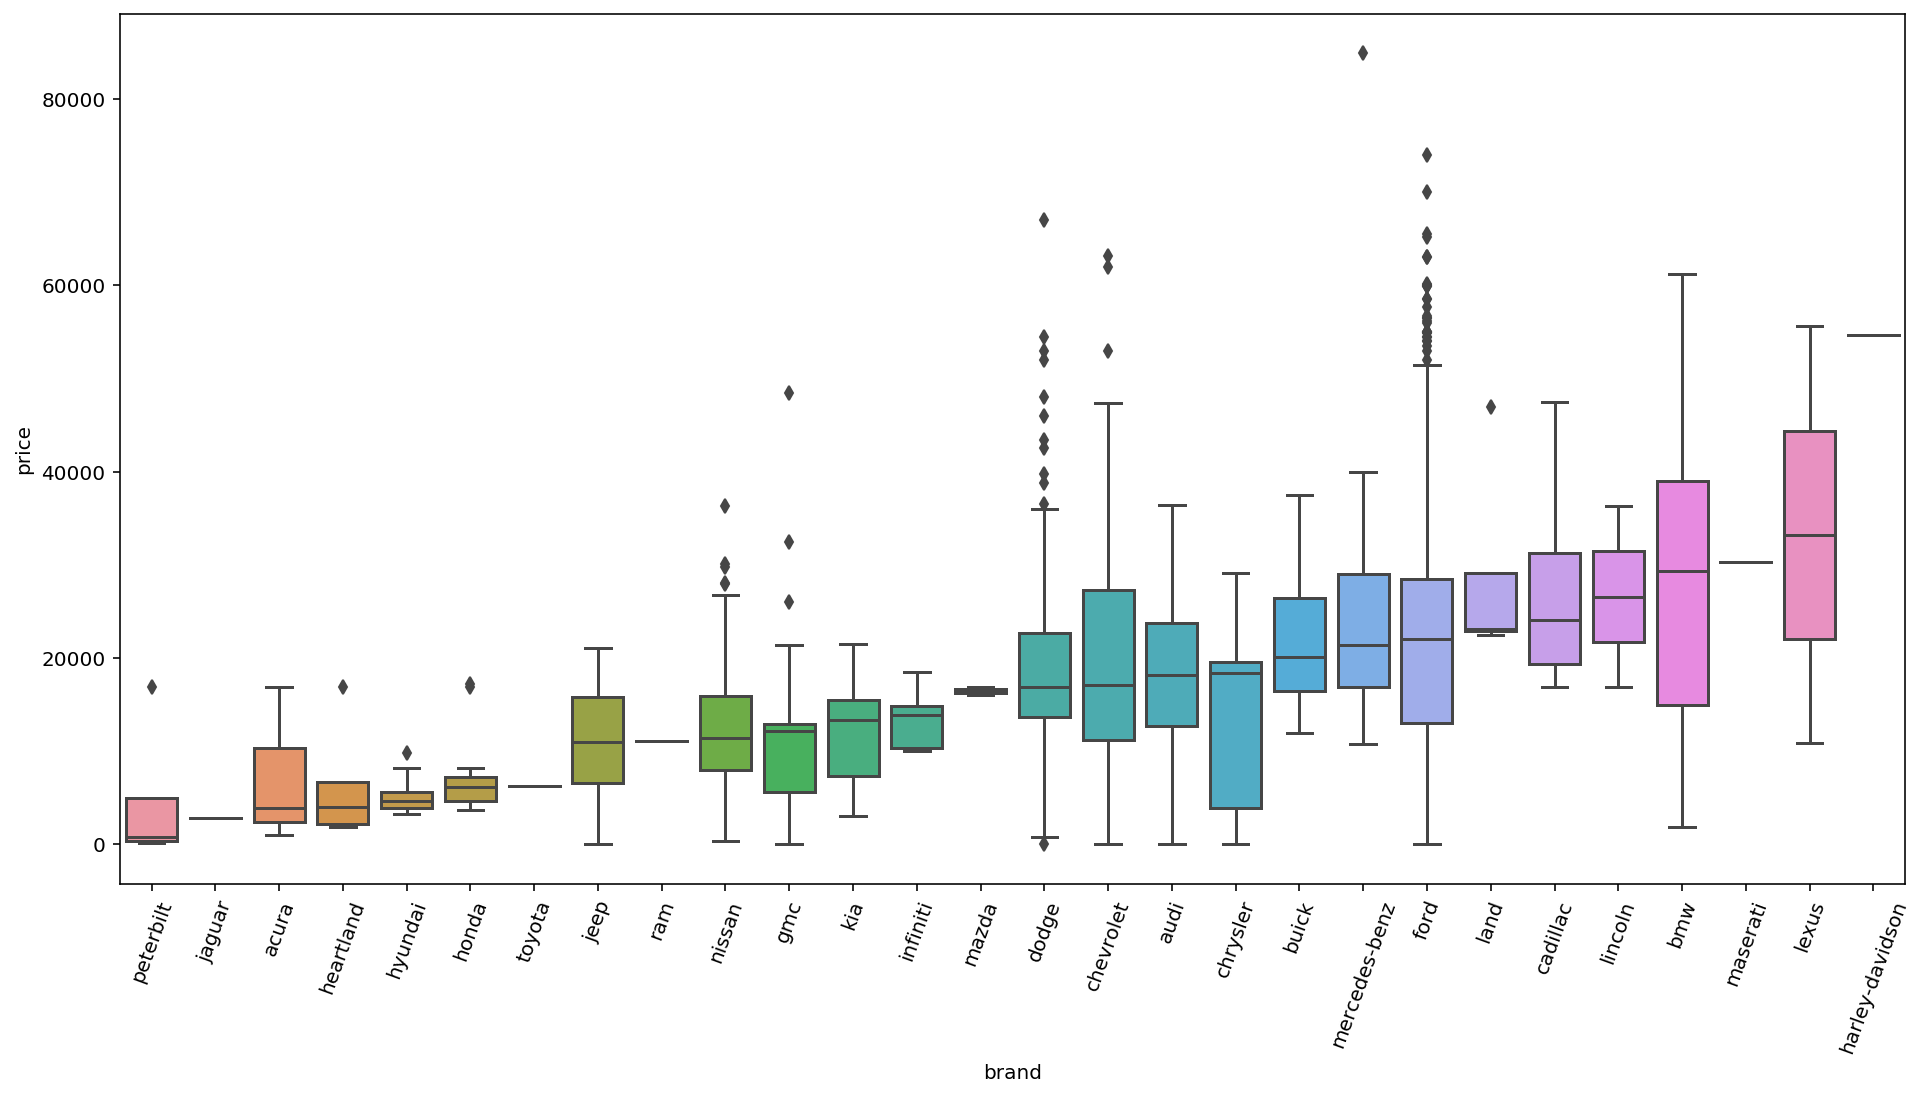

In [25]:
plt.figure(figsize=(16,8))
sorted_nb = df.groupby(['brand'])['price'].median().sort_values()
sns.boxplot(x = df['brand'], y = df['price'], order=list(sorted_nb.index))
plt.xticks(rotation=70)

#### Number of cars from top 30 states

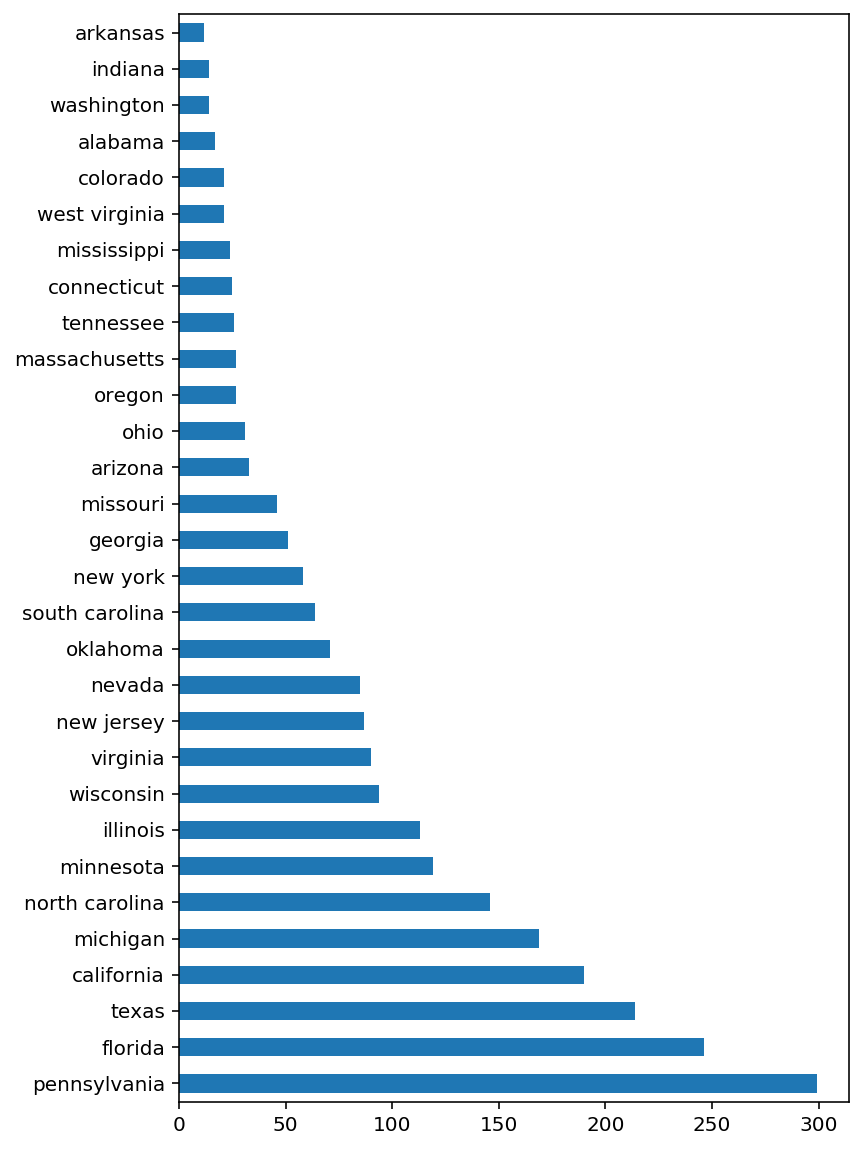

In [26]:
df['state'].value_counts().head(30). plot(kind='barh', figsize=(6,10))

#### Number of Cars vs Colour

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

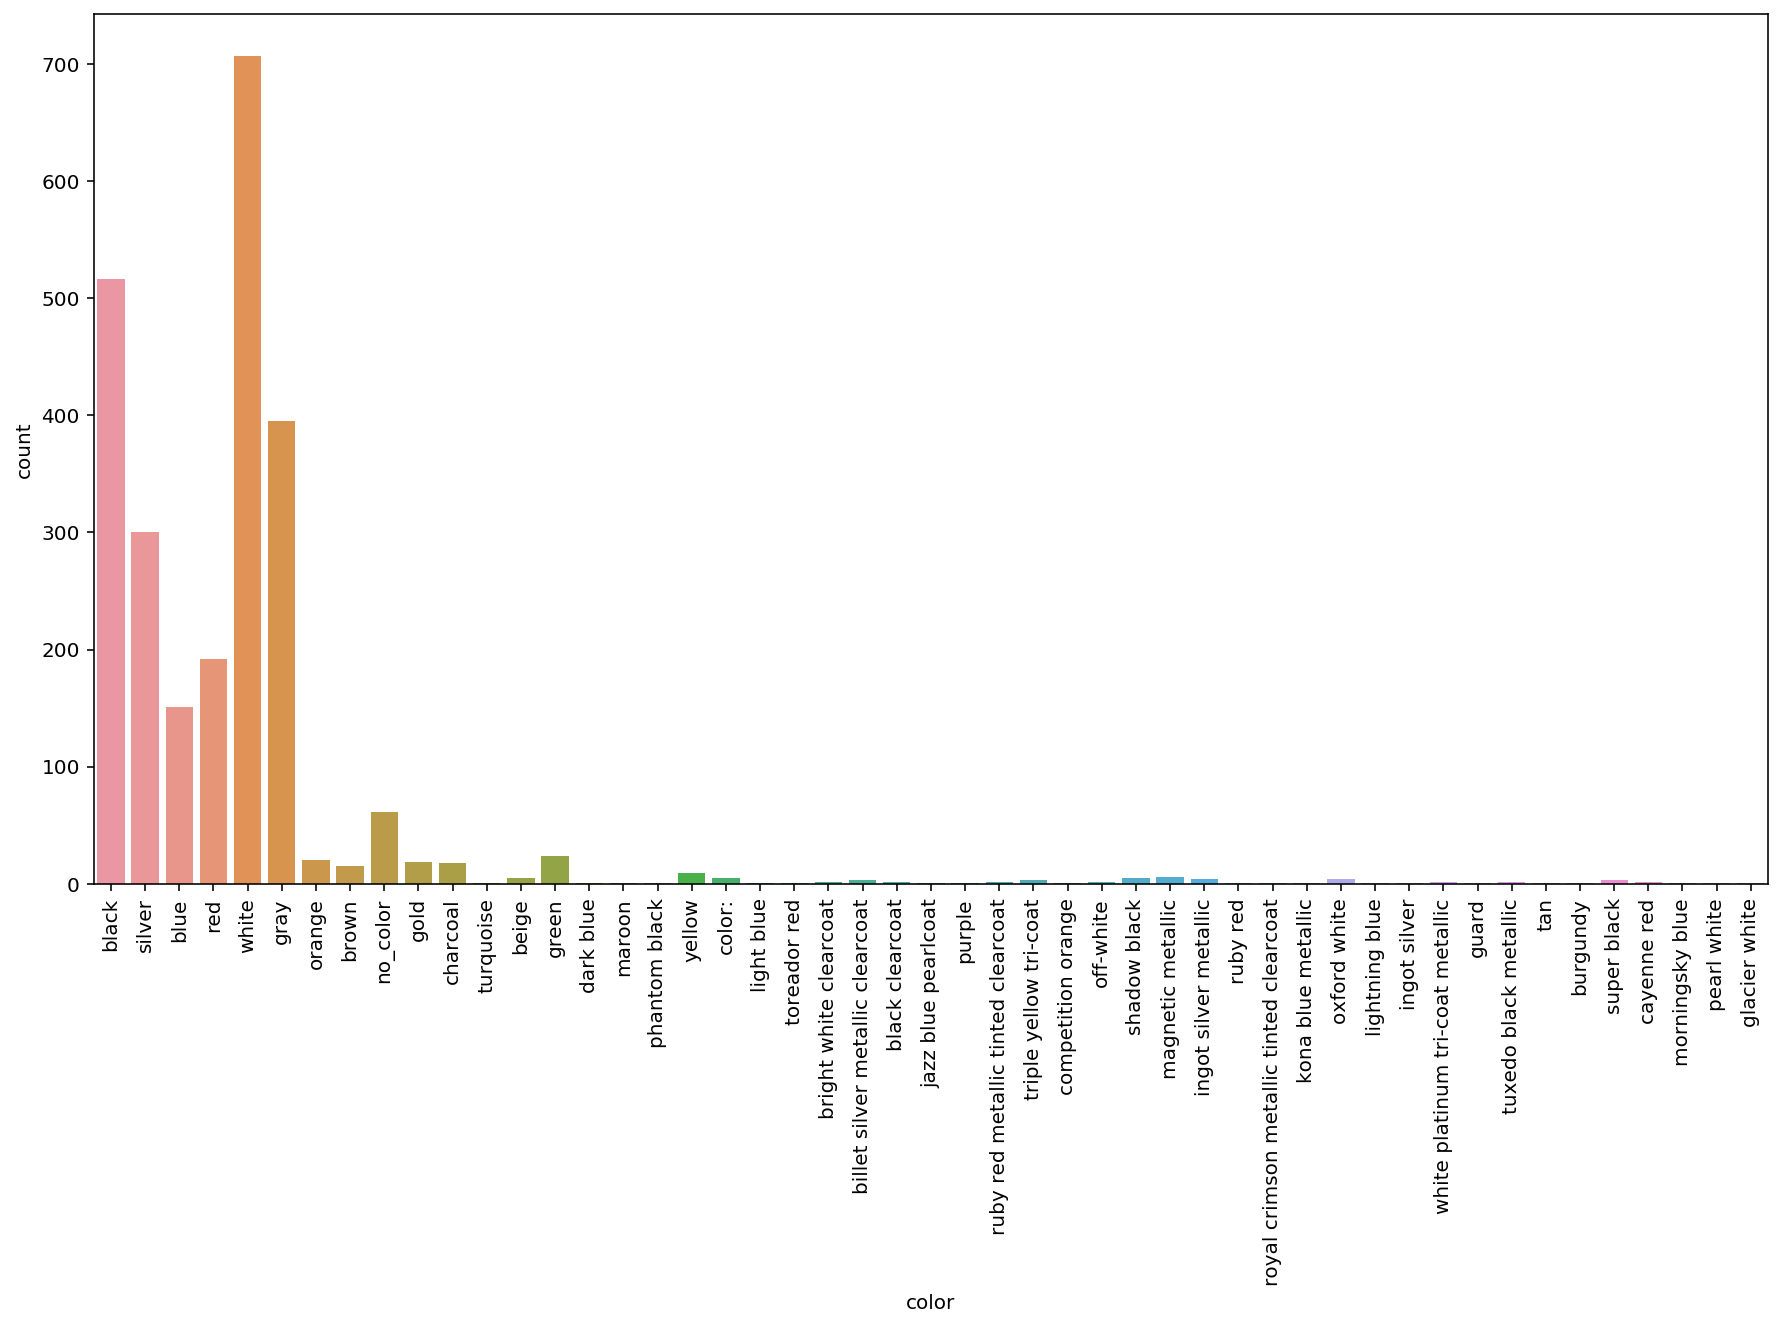

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(df['color']);
plt.xticks(rotation=90)

#### Correlation heatmap of all the features using Seaborn

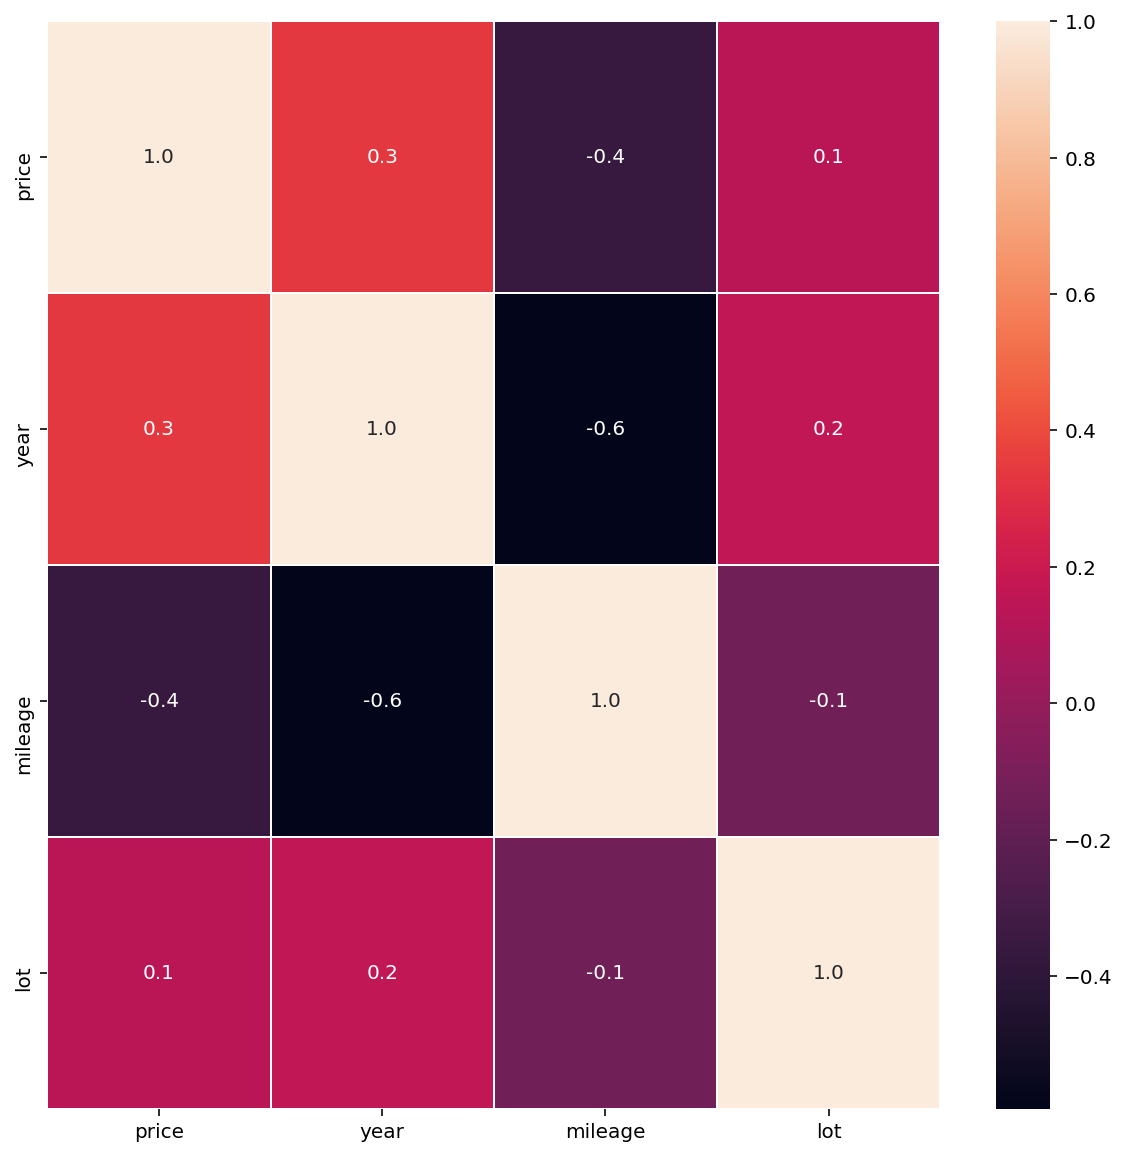

In [28]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Price and Model year have positive correlation, i.e. newer the car, higher the price.

Price and Mileage have negatve correlation, i.e. as the miles traveled by the car increases, it's price decreases.